<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/UAS/03_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi

Notebook ini menjelaskan klasifikasi biner menggunakan `LogisticRegression` dan `SGDClassifier`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

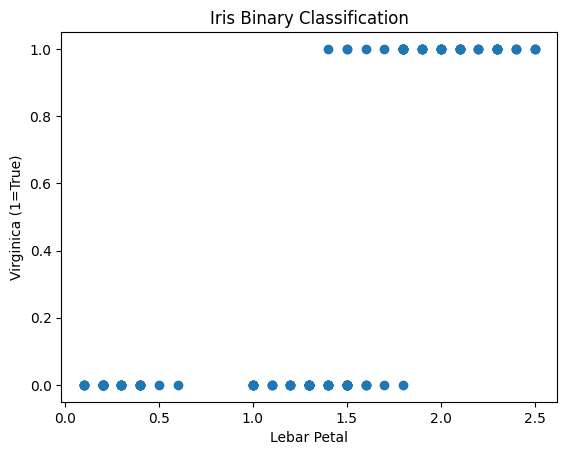

In [2]:
# Gunakan hanya dua kelas dan satu fitur untuk klasifikasi biner sederhana
iris = load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # Setosa=0, Versicolor=0, Virginica=1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X, y)
plt.xlabel("Lebar Petal")
plt.ylabel("Virginica (1=True)")
plt.title("Iris Binary Classification")
plt.show()

In [3]:
# Model Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediksi & Evaluasi
y_pred = log_reg.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 1.0
[[19  0]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



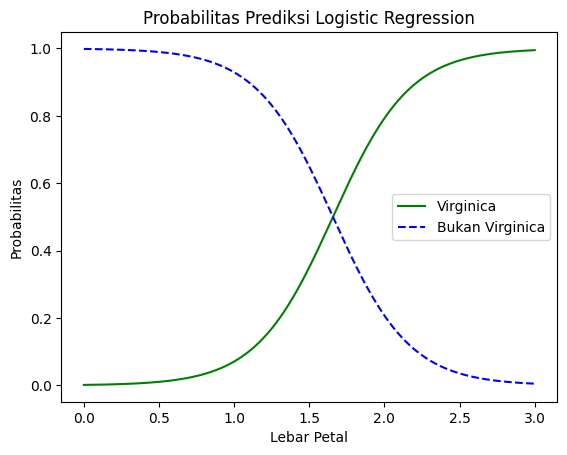

In [4]:
# Visualisasi kurva sigmoid
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Bukan Virginica")
plt.xlabel("Lebar Petal")
plt.ylabel("Probabilitas")
plt.legend()
plt.title("Probabilitas Prediksi Logistic Regression")
plt.show()

In [5]:
# Latihan 1: Klasifikasi dengan SGDClassifier
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

y_pred_sgd = sgd_clf.predict(X_test)
print("Akurasi (SGD):", accuracy_score(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))

Akurasi (SGD): 0.9666666666666667
[[18  1]
 [ 0 11]]


In [6]:
# Latihan 2: Gunakan dua fitur
X2 = iris["data"][:, (2, 3)]  # petal length dan width
y2 = (iris["target"] == 2).astype(int)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

log_reg2 = LogisticRegression()
log_reg2.fit(X2_train, y2_train)

print("Akurasi (2 fitur):", log_reg2.score(X2_test, y2_test))

Akurasi (2 fitur): 1.0


## Kesimpulan

- Model klasifikasi biner dapat dilakukan dengan `LogisticRegression` atau `SGDClassifier`.
- Menggunakan dua fitur bisa meningkatkan akurasi model.
- Evaluasi dilakukan menggunakan metrik seperti akurasi dan confusion matrix.
